In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


#import csv and change column names
columns = ['ID', 'A2','A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'CLASS']
df = pd.read_csv("wisconsinbreastcancer.txt", sep=',', names=columns)
df['A7']=df['A7'].replace('?',np.NaN)

#convert back to numeric
df['A7'] = pd.to_numeric(df['A7'], errors='coerce')

#•Report how many NaN.
countNaN=df['A7'].isnull().sum()


#change values of NaN to mean
df['A7'] = df['A7'].fillna((df['A7'].mean()))

df = df.astype(int)

In [4]:
#use only columns A2-A10
df1=df.drop(["ID","CLASS"],axis=1)
df1.head()

,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [5]:
#import KMeans - use sklearn.cluster create KMeans model for n_cluster = 4

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

#fit model to your data
km.fit(df1)
x=km.fit_predict(df1)
print(x)

[0 2 0 3 0 1 0 0 0 0 0 0 0 0 1 3 0 0 2 0 2 3 0 3 0 2 0 0 0 0 0 0 3 0 0 0 3
 0 2 2 3 3 1 3 3 0 2 0 0 3 3 0 3 1 2 3 3 3 2 3 3 0 3 3 0 3 0 2 1 0 0 3 0 2
 3 0 0 0 0 0 0 0 0 0 1 3 2 1 0 0 0 0 0 0 0 0 0 0 3 1 3 0 0 0 1 0 2 1 0 2 0
 2 2 1 0 0 0 1 0 0 0 0 1 2 1 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 1 0 2 3 0 0 2 0 0 0 1 2 0 0 0 0 0 1 3 0 0 0 0 0 1 2 1 0 3 0 2 0 0 0 1 2
 0 1 1 1 0 1 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 3 0 0 0 1 1 0 1 1 3 0 0 3 0 0 1
 0 2 2 0 2 3 0 1 2 1 3 2 0 0 1 3 1 2 0 0 0 0 0 0 1 2 0 0 0 2 2 1 3 2 0 0 0
 2 2 1 1 2 3 0 2 2 3 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 1 1 0 3 1 0 0 3 2 0 2
 3 0 0 2 3 0 1 0 2 2 0 0 3 0 0 0 3 0 0 3 2 1 0 2 2 0 0 2 0 0 2 0 3 2 2 0 0
 2 2 0 2 0 0 2 2 0 0 0 1 0 0 0 3 2 0 0 3 1 0 0 0 1 3 2 1 2 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 3 0 2 0 2 0 0 0 0 1 0 0 0 1 0 3 0 0 0 0 0 0 2 2 3 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 2 3 0 0 0 0 0 0 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 3 0 0 2 0 

In [9]:
#calculate centroids

centroids = km.cluster_centers_

#print centroids 
print(centroids)

[[4.06772908 1.25099602 1.40239044 1.34661355 2.02390438 1.26693227
  2.01992032 1.15936255 1.02788845]
 [6.86956522 9.7826087  9.47826087 8.95652174 5.95652174 9.69565217
  7.60869565 6.43478261 2.47826087]
 [8.         8.875      7.625      2.4375     5.375      2.875
  5.0625     8.9375     2.0625    ]
 [4.04761905 3.42857143 3.47619048 4.         4.52380952 3.42857143
  4.         5.95238095 1.        ]
 [9.05882353 3.29411765 4.17647059 3.17647059 3.35294118 9.64705882
  4.29411765 3.58823529 1.58823529]
 [7.07692308 4.53846154 4.26923077 9.19230769 4.65384615 9.61538462
  5.69230769 3.61538462 2.42307692]
 [8.83333333 9.33333333 8.91666667 3.08333333 9.33333333 9.08333333
  6.66666667 3.08333333 1.66666667]
 [8.1        9.25       8.9        7.95       8.45       7.25
  6.6        8.5        9.05      ]
 [5.92857143 5.67857143 5.82142857 3.25       4.25       9.60714286
  5.         2.10714286 1.35714286]
 [1.24468085 1.12234043 1.21276596 1.13829787 1.97340426 1.29787234
  1.994

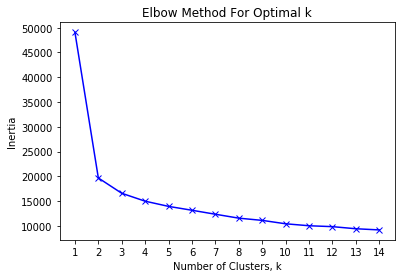

The elbow point is at 2, so the optimal number of clusters is 2.


In [10]:
#create a range from 1 to 15 or more
ks = range(1, 15)

#create an empty list for inertias values 
inertias = []

#use for loop to calculate KMeans for each values
for k in ks:
    km = KMeans(n_clusters=k)
    km=km.fit(df1)
    inertias.append(km.inertia_)
     

# Plot ks vs inertias
plt.plot(ks, inertias, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(ks)
plt.show()

print("The elbow point is at 2, so the optimal number of clusters is 2.")

In [47]:
stat_tab = pd.DataFrame()
#Calc sd and fill
sd_col = (df1.std())
stat_tab['Stan Dev'] = round(sd_col,1)
print(stat_tab)

axis_col = (df1.std())
stat_tab['Stan Dev'] = round(sd_col,1)

     Stan Dev
A2        2.8
A3        3.1
A4        3.0
A5        2.9
A6        2.2
A7        3.6
A8        2.4
A9        3.1
A10       1.7


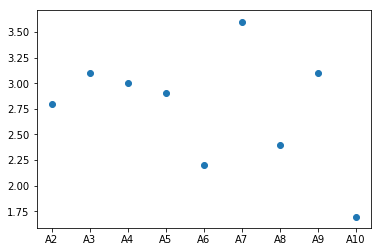

In [50]:
plt.scatter(stat_tab.index, stat_tab['Stan Dev'])


In [60]:
#import make_pipeline and StandardScalar
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: k
k = KMeans(n_clusters=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, k)

pipeline.fit(df1)
centroids = k.cluster_centers_

print(centroids)

[[-0.49242566 -0.60498902 -0.59950463 -0.51517139 -0.50979898 -0.57996368
  -0.54338987 -0.52954512 -0.30384439]
 [ 0.98485132  1.20997804  1.19900927  1.03034277  1.01959796  1.15992736
   1.08677975  1.05909024  0.60768878]]
